In [3]:
import pyAgrum as gum

In [4]:
import pyAgrum.lib.notebook as gnb

In [5]:
bn=gum.BayesNet('WaterSprinkler')
print(bn)

BN{nodes: 0, arcs: 0, domainSize: 1, dim: 0}


In [6]:
c=bn.add(gum.LabelizedVariable('c','cloudy ?',2))
print(c)

0


In [7]:
s, r, w = [ bn.add(name, 2) for name in "srw" ] #bn.add(name, 2) === bn.add(gum.LabelizedVariable(name, name, 2))
print (s,r,w)
print (bn)

1 2 3
BN{nodes: 4, arcs: 0, domainSize: 16, dim: 8}


In [8]:
bn.addArc(c,s)

In [9]:
for link in [(c,r),(s,w),(r,w)]:
    bn.addArc(*link)
print(bn)

BN{nodes: 4, arcs: 4, domainSize: 16, dim: 18}


In [10]:
bn

(gum::BayesNet<double>@0x7fffe7efbf20) BN{nodes: 4, arcs: 4, domainSize: 16, dim: 18}

In [11]:
bn2 = gum.loadBN("Stress Test 3.dsl")


In [12]:
bn2

(gum::BayesNet<double>@0x7fffe7f0ba80) BN{nodes: 15, arcs: 21, domainSize: 10^8.09834, dim: 1160}

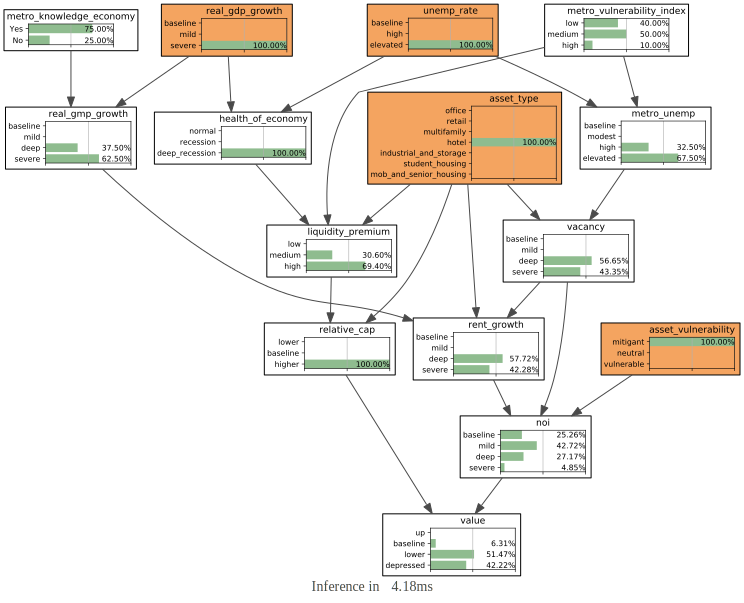

In [13]:
gnb.showInference(bn2, evs={"asset_type":"hotel", "real_gdp_growth":"severe", "unemp_rate":"elevated", "asset_vulnerability":"mitigant"}, size="20")

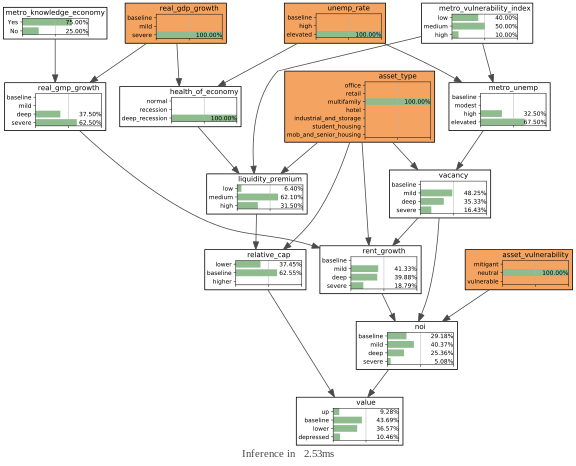

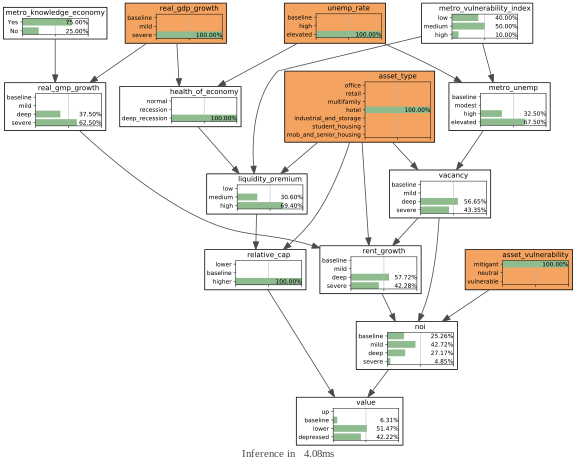

None,None


In [12]:
gnb.sideBySide(
    gnb.showInference(bn2, evs={"asset_type":"multifamily", "real_gdp_growth":"severe", "unemp_rate":"elevated", "asset_vulnerability":"neutral"}),
    gnb.showInference(bn2, evs={"asset_type":"hotel", "real_gdp_growth":"severe", "unemp_rate":"elevated", "asset_vulnerability":"mitigant"}))

In [13]:
gum.getPosterior(bn2,{"asset_type":"multifamily","real_gdp_growth":"severe", "unemp_rate":"elevated", "asset_vulnerability":"neutral"},'value').tolist()

[0.09278641542581811,
 0.4368837838378317,
 0.3656857549582173,
 0.10464404577813272]

In [14]:
bn=gum.fastBN("A[1, 1.5, 2, 2.5, 3, 4]->C[1,4]->B{chaud|tiede|froid}");
bn.cpt("A").fillWith([1, 2, 3, 4, 5]).normalize();
bn.cpt("C").fillWith([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]).normalizeAsCPT();
bn.cpt("B").fillWith([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]).normalizeAsCPT();
bn

(gum::BayesNet<double>@0x7fffbfa33fa0) BN{nodes: 3, arcs: 2, domainSize: 60, dim: 37}

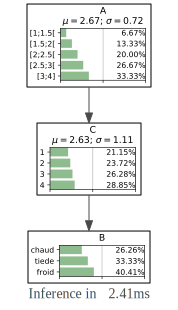

In [15]:
gnb.showInference(bn)

In [151]:
## Quasi COntinuous
import pandas as pd
import numpy as np

from scipy.stats import norm,maxwell
from scipy.stats import beta

%matplotlib inline
import matplotlib.pyplot as plt

BN{nodes: 2, arcs: 1, domainSize: 600, dim: 602}


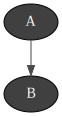

In [16]:
bn1=gum.BayesNet("Quasi-Continuous")
a=bn1.add(gum.LabelizedVariable("A","A binary variable",2))
b=bn1.add(gum.RangeVariable("B","A range variable",0,300 - 1))
bn1.addArc(a,b)
print(bn)
gnb.showBN(bn1)




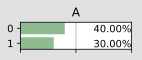

In [17]:
bn1.cpt(a)[:]=[0.4, 0.3]
gnb.showProba(bn1.cpt(a))


In [18]:
def normalize(rv,vmin,vmax,size):
    pdf=rv.pdf(np.linspace(vmin,vmax,size))
    return (pdf/sum(pdf))

In [21]:
bn1.cpt(b)[{'A':0}]=normalize(norm(),-4,1,300)
bn1.cpt(b)[{'A':1}]=normalize(norm(),-3,3,300)
#bn.cpt(b)[{'A':2}]=normalize(norm(),-1,4,300)

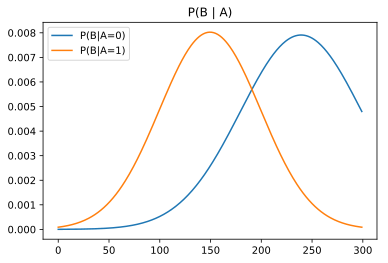

In [23]:
plt.plot(normalize(norm(),-4,1,300)) # P(B|A=0) is a Gaussian distribution
plt.plot(normalize(norm(),-3,3,300)) # P(B|A=0) is a Gaussian distribution
#plt.plot(normalize(norm(),-1,4,300)) # P(B|A=0) is a Gaussian distribution
plt.title("P(B | A)")
plt.legend(["P(B|A=0)","P(B|A=1)", "P(B|A=2)"],loc='best')

In [24]:
bn1.cpt("B").normalizeAsCPT()
bn1.cpt("B")

(gum::Potential<double>@0x7fffe816fa90) <B:0|A:0> :: 2.65372e-06 /<B:1|A:0> :: 2.8369e-06 /<B:2|A:0> :: 3.03188e-06 /<B:3|A:0> :: 3.23935e-06 /<B:4|A:0> :: 3.46005e-06 /<B:5|A:0> :: 3.69475e-06 /<B:6|A:0> :: 3.94428e-06 /<B:7|A:0> :: 4.20947e-06 /<B:8|A:0> :: 4.49124e-06 /<B:9|A:0> :: 4.79054e-06 /<B:10|A:0> :: 5.10835e-06 /<B:11|A:0> :: 5.44572e-06 /<B:12|A:0> :: 5.80374e-06 /<B:13|A:0> :: 6.18358e-06 /<B:14|A:0> :: 6.58643e-06 /<B:15|A:0> :: 7.01357e-06 /<B:16|A:0> :: 7.46632e-06 /<B:17|A:0> :: 7.94607e-06 /<B:18|A:0> :: 8.45428e-06 /<B:19|A:0> :: 8.99249e-06 /<B:20|A:0> :: 9.56228e-06 /<B:21|A:0> :: 1.01653e-05 /<B:22|A:0> :: 1.08034e-05 /<B:23|A:0> :: 1.14783e-05 /<B:24|A:0> :: 1.2192e-05 /<B:25|A:0> :: 1.29464e-05 /<B:26|A:0> :: 1.37436e-05 /<B:27|A:0> :: 1.45859e-05 /<B:28|A:0> :: 1.54754e-05 /<B:29|A:0> :: 1.64146e-05 /<B:30|A:0> :: 1.7406e-05 /<B:31|A:0> :: 1.8452e-05 /<B:32|A:0> :: 1.95555e-05 /<B:33|A:0> :: 2.07191e-05 /<B:34|A:0> :: 2.19458e-05 /<B:35|A:0> :: 2.32387e-05 /<B:36|A:0> :: 2.46009e-05 /<B:37|A:0> :: 2.60356e-05 /<B:38|A:0> :: 2.75463e-05 /<B:39|A:0> :: 2.91365e-05 /<B:40|A:0> :: 3.08099e-05 /<B:41|A:0> :: 3.25703e-05 /<B:42|A:0> :: 3.44216e-05 /<B:43|A:0> :: 3.6368e-05 /<B:44|A:0> :: 3.84137e-05 /<B:45|A:0> :: 4.05632e-05 /<B:46|A:0> :: 4.28209e-05 /<B:47|A:0> :: 4.51917e-05 /<B:48|A:0> :: 4.76804e-05 /<B:49|A:0> :: 5.0292e-05 /<B:50|A:0> :: 5.30319e-05 /<B:51|A:0> :: 5.59055e-05 /<B:52|A:0> :: 5.89182e-05 /<B:53|A:0> :: 6.2076e-05 /<B:54|A:0> :: 6.53847e-05 /<B:55|A:0> :: 6.88505e-05 /<B:56|A:0> :: 7.24797e-05 /<B:57|A:0> :: 7.62789e-05 /<B:58|A:0> :: 8.02549e-05 /<B:59|A:0> :: 8.44144e-05 /<B:60|A:0> :: 8.87647e-05 /<B:61|A:0> :: 9.33131e-05 /<B:62|A:0> :: 9.80671e-05 /<B:63|A:0> :: 0.000103035 /<B:64|A:0> :: 0.000108223 /<B:65|A:0> :: 0.000113642 /<B:66|A:0> :: 0.000119298 /<B:67|A:0> :: 0.000125201 /<B:68|A:0> :: 0.000131359 /<B:69|A:0> :: 0.000137781 /<B:70|A:0> :: 0.000144477 /<B:71|A:0> :: 0.000151456 /<B:72|A:0> :: 0.000158728 /<B:73|A:0> :: 0.000166302 /<B:74|A:0> :: 0.000174189 /<B:75|A:0> :: 0.000182399 /<B:76|A:0> :: 0.000190943 /<B:77|A:0> :: 0.000199831 /<B:78|A:0> :: 0.000209075 /<B:79|A:0> :: 0.000218684 /<B:80|A:0> :: 0.000228672 /<B:81|A:0> :: 0.000239048 /<B:82|A:0> :: 0.000249826 /<B:83|A:0> :: 0.000261017 /<B:84|A:0> :: 0.000272632 /<B:85|A:0> :: 0.000284685 /<B:86|A:0> :: 0.000297188 /<B:87|A:0> :: 0.000310153 /<B:88|A:0> :: 0.000323593 /<B:89|A:0> :: 0.000337521 /<B:90|A:0> :: 0.00035195 /<B:91|A:0> :: 0.000366894 /<B:92|A:0> :: 0.000382365 /<B:93|A:0> :: 0.000398377 /<B:94|A:0> :: 0.000414943 /<B:95|A:0> :: 0.000432078 /<B:96|A:0> :: 0.000449794 /<B:97|A:0> :: 0.000468106 /<B:98|A:0> :: 0.000487027 /<B:99|A:0> :: 0.000506571 /<B:100|A:0> :: 0.000526752 /<B:101|A:0> :: 0.000547584 /<B:102|A:0> :: 0.000569081 /<B:103|A:0> :: 0.000591256 /<B:104|A:0> :: 0.000614123 /<B:105|A:0> :: 0.000637697 /<B:106|A:0> :: 0.00066199 /<B:107|A:0> :: 0.000687017 /<B:108|A:0> :: 0.00071279 /<B:109|A:0> :: 0.000739324 /<B:110|A:0> :: 0.000766631 /<B:111|A:0> :: 0.000794724 /<B:112|A:0> :: 0.000823616 /<B:113|A:0> :: 0.00085332 /<B:114|A:0> :: 0.000883848 /<B:115|A:0> :: 0.000915213 /<B:116|A:0> :: 0.000947425 /<B:117|A:0> :: 0.000980497 /<B:118|A:0> :: 0.00101444 /<B:119|A:0> :: 0.00104926 /<B:120|A:0> :: 0.00108498 /<B:121|A:0> :: 0.0011216 /<B:122|A:0> :: 0.00115913 /<B:123|A:0> :: 0.00119758 /<B:124|A:0> :: 0.00123696 /<B:125|A:0> :: 0.00127728 /<B:126|A:0> :: 0.00131854 /<B:127|A:0> :: 0.00136076 /<B:128|A:0> :: 0.00140393 /<B:129|A:0> :: 0.00144807 /<B:130|A:0> :: 0.00149318 /<B:131|A:0> :: 0.00153927 /<B:132|A:0> :: 0.00158633 /<B:133|A:0> :: 0.00163438 /<B:134|A:0> :: 0.0016834 /<B:135|A:0> :: 0.00173342 /<B:136|A:0> :: 0.00178442 /<B:137|A:0> :: 0.00183641 /<B:138|A:0> :: 0.00188939 /<B:139|A:0> :: 0.00194335 /<B:140|A:0> :: 0.00199829 /<B:141|A:0> :: 0.00205421 /<B:142|A:0> :: 0.00211111 /<B:143|A:0> :: 0.00216898 /<B:144|A:0> :: 0.0022278 /<B:145|A:0> :: 0.00228759 /<B:146|A:0> :: 0.0023483

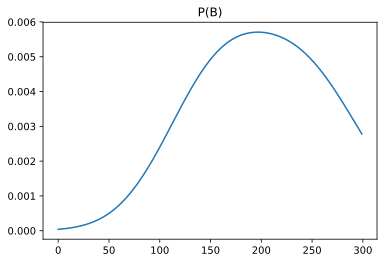

In [26]:
ie=gum.LazyPropagation(bn1)
ie.makeInference()
plt.plot(ie.posterior(b)[:]) # the posterior for B
t=plt.title("P(B)")

BN{nodes: 2, arcs: 1, domainSize: 600, dim: 602}


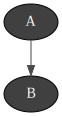

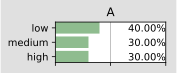

In [41]:
# Continuous with 3 categories
bn2=gum.BayesNet("Quasi-Continuous")
a=bn2.add(gum.LabelizedVariable("A","A binary variable",['low', 'medium', 'high']))
b=bn2.add(gum.RangeVariable("B","A range variable",0,300 - 1))
bn2.addArc(a,b)
print(bn)
gnb.showBN(bn2)

bn2.cpt(a)[:]=[0.4, 0.3, 0.3]
gnb.showProba(bn2.cpt(a))

In [31]:
bn2.cpt(b)[{'A':0}]=normalize(norm(),-4,1,300)
bn2.cpt(b)[{'A':1}]=normalize(norm(),-3,3,300)
bn2.cpt(b)[{'A':2}]=normalize(norm(),-1,4,300)

In [35]:
bn2.cpt("B").translate(1e-4).normalizeAsCPT()


(gum::Potential<double>@0x7fffe82b5220) <B:0|A:0> :: 9.96638e-05 /<B:1|A:0> :: 9.98416e-05 /<B:2|A:0> :: 0.000100031 /<B:3|A:0> :: 0.000100232 /<B:4|A:0> :: 0.000100447 /<B:5|A:0> :: 0.000100675 /<B:6|A:0> :: 0.000100917 /<B:7|A:0> :: 0.000101174 /<B:8|A:0> :: 0.000101448 /<B:9|A:0> :: 0.000101738 /<B:10|A:0> :: 0.000102047 /<B:11|A:0> :: 0.000102374 /<B:12|A:0> :: 0.000102722 /<B:13|A:0> :: 0.000103091 /<B:14|A:0> :: 0.000103482 /<B:15|A:0> :: 0.000103897 /<B:16|A:0> :: 0.000104336 /<B:17|A:0> :: 0.000104802 /<B:18|A:0> :: 0.000105295 /<B:19|A:0> :: 0.000105818 /<B:20|A:0> :: 0.000106371 /<B:21|A:0> :: 0.000106957 /<B:22|A:0> :: 0.000107576 /<B:23|A:0> :: 0.000108231 /<B:24|A:0> :: 0.000108924 /<B:25|A:0> :: 0.000109657 /<B:26|A:0> :: 0.000110431 /<B:27|A:0> :: 0.000111248 /<B:28|A:0> :: 0.000112112 /<B:29|A:0> :: 0.000113024 /<B:30|A:0> :: 0.000113986 /<B:31|A:0> :: 0.000115002 /<B:32|A:0> :: 0.000116073 /<B:33|A:0> :: 0.000117203 /<B:34|A:0> :: 0.000118394 /<B:35|A:0> :: 0.000119649 /<B:36|A:0> :: 0.000120972 /<B:37|A:0> :: 0.000122365 /<B:38|A:0> :: 0.000123831 /<B:39|A:0> :: 0.000125375 /<B:40|A:0> :: 0.000127 /<B:41|A:0> :: 0.000128709 /<B:42|A:0> :: 0.000130506 /<B:43|A:0> :: 0.000132396 /<B:44|A:0> :: 0.000134382 /<B:45|A:0> :: 0.000136469 /<B:46|A:0> :: 0.000138661 /<B:47|A:0> :: 0.000140963 /<B:48|A:0> :: 0.000143379 /<B:49|A:0> :: 0.000145915 /<B:50|A:0> :: 0.000148575 /<B:51|A:0> :: 0.000151365 /<B:52|A:0> :: 0.00015429 /<B:53|A:0> :: 0.000157355 /<B:54|A:0> :: 0.000160568 /<B:55|A:0> :: 0.000163933 /<B:56|A:0> :: 0.000167456 /<B:57|A:0> :: 0.000171145 /<B:58|A:0> :: 0.000175005 /<B:59|A:0> :: 0.000179043 /<B:60|A:0> :: 0.000183267 /<B:61|A:0> :: 0.000187683 /<B:62|A:0> :: 0.000192298 /<B:63|A:0> :: 0.000197121 /<B:64|A:0> :: 0.000202159 /<B:65|A:0> :: 0.000207419 /<B:66|A:0> :: 0.000212911 /<B:67|A:0> :: 0.000218641 /<B:68|A:0> :: 0.00022462 /<B:69|A:0> :: 0.000230855 /<B:70|A:0> :: 0.000237356 /<B:71|A:0> :: 0.000244132 /<B:72|A:0> :: 0.000251192 /<B:73|A:0> :: 0.000258546 /<B:74|A:0> :: 0.000266203 /<B:75|A:0> :: 0.000274174 /<B:76|A:0> :: 0.000282469 /<B:77|A:0> :: 0.000291098 /<B:78|A:0> :: 0.000300072 /<B:79|A:0> :: 0.000309402 /<B:80|A:0> :: 0.000319099 /<B:81|A:0> :: 0.000329173 /<B:82|A:0> :: 0.000339637 /<B:83|A:0> :: 0.000350502 /<B:84|A:0> :: 0.000361779 /<B:85|A:0> :: 0.000373481 /<B:86|A:0> :: 0.000385619 /<B:87|A:0> :: 0.000398207 /<B:88|A:0> :: 0.000411255 /<B:89|A:0> :: 0.000424778 /<B:90|A:0> :: 0.000438787 /<B:91|A:0> :: 0.000453295 /<B:92|A:0> :: 0.000468315 /<B:93|A:0> :: 0.000483861 /<B:94|A:0> :: 0.000499945 /<B:95|A:0> :: 0.00051658 /<B:96|A:0> :: 0.000533781 /<B:97|A:0> :: 0.000551559 /<B:98|A:0> :: 0.000569929 /<B:99|A:0> :: 0.000588904 /<B:100|A:0> :: 0.000608497 /<B:101|A:0> :: 0.000628722 /<B:102|A:0> :: 0.000649593 /<B:103|A:0> :: 0.000671122 /<B:104|A:0> :: 0.000693324 /<B:105|A:0> :: 0.000716211 /<B:106|A:0> :: 0.000739796 /<B:107|A:0> :: 0.000764094 /<B:108|A:0> :: 0.000789117 /<B:109|A:0> :: 0.000814878 /<B:110|A:0> :: 0.000841389 /<B:111|A:0> :: 0.000868664 /<B:112|A:0> :: 0.000896715 /<B:113|A:0> :: 0.000925554 /<B:114|A:0> :: 0.000955193 /<B:115|A:0> :: 0.000985643 /<B:116|A:0> :: 0.00101692 /<B:117|A:0> :: 0.00104903 /<B:118|A:0> :: 0.00108198 /<B:119|A:0> :: 0.00111579 /<B:120|A:0> :: 0.00115047 /<B:121|A:0> :: 0.00118602 /<B:122|A:0> :: 0.00122245 /<B:123|A:0> :: 0.00125979 /<B:124|A:0> :: 0.00129802 /<B:125|A:0> :: 0.00133716 /<B:126|A:0> :: 0.00137722 /<B:127|A:0> :: 0.00141821 /<B:128|A:0> :: 0.00146013 /<B:129|A:0> :: 0.00150298 /<B:130|A:0> :: 0.00154678 /<B:131|A:0> :: 0.00159152 /<B:132|A:0> :: 0.00163721 /<B:133|A:0> :: 0.00168386 /<B:134|A:0> :: 0.00173146 /<B:135|A:0> :: 0.00178002 /<B:136|A:0> :: 0.00182954 /<B:137|A:0> :: 0.00188001 /<B:138|A:0> :: 0.00193145 /<B:139|A:0> :: 0.00198383 /<B:140|A:0> :: 0.00203718 /<B:141|A:0> :: 0.00209147 /<B:142|A:0> :: 0.00214671 /<B:143|A:0> :: 0.00220289 /<B:144|A:0> :: 0.00226 /<B:145|A:0> :: 0.00231805 /<B:146|A:0> :: 0.0023

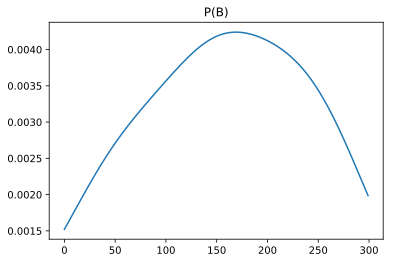

In [36]:
ie=gum.LazyPropagation(bn2)
ie.makeInference()
plt.plot(ie.posterior(b)[:]) # the posterior for B
t=plt.title("P(B)")

In [40]:
ie.setEvidence({'B':150})
ie.makeInference()
ie.posterior(a)

(gum::Potential<double>@0x7fffe8287470) <A:0> :: 0.250695 /<A:1> :: 0.56577 /<A:2> :: 0.183536

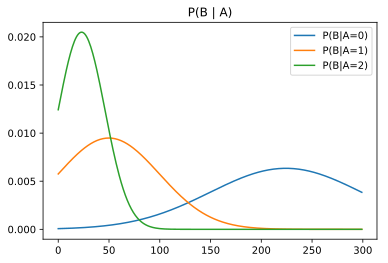

In [190]:
plt.plot(normalize(norm(),-3,1,300)) # P(B|A=0) is a Gaussian distribution
plt.plot(normalize(norm(),-1,5,300)) # P(B|A=1) is a Gaussian distribution
plt.plot(normalize(norm(),-1,12,300)) # P(B|A=2) is a Gaussian distribution
plt.title("P(B | A)")
plt.legend(["P(B|A=0)","P(B|A=1)", "P(B|A=2)"],loc='best')

In [86]:
def makeBN(a_name, a_categories, a_prior, b_size, b_dat ):
    bnz=gum.BayesNet("Quasi-Continuous")
    a=bnz.add(gum.LabelizedVariable("A",a_name,a_categories))
    b=bnz.add(gum.RangeVariable("B","A range variable",0,b_size - 1))
    bnz.addArc(a,b)
    gnb.showBN(bn2)

    #bnz.generateCPTs()
    bn.cpt(a)[:] = a_prior
    
    gnb.showProba(bnz.cpt(a))
    
    for i, item in enumerate(b_dat):
        bnz.cpt(b)[{'A':a_categories[i]}] = normalize(item['fun'],item['min'],item['max'],b_size)
    
    bnz.cpt("B").translate(1e-4).normalizeAsCPT()
    ie=gum.LazyPropagation(bnz)
    ie.makeInference()
    plt.plot(ie.posterior(b)[:]) # the posterior for B
    t=plt.title("P(B)")
    return ie

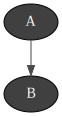

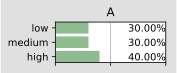

281


(gum::Potential<double>@0x7fffeb443560) <A:low> :: 0.433038 /<A:medium> :: 0.523856 /<A:high> :: 0.0431062

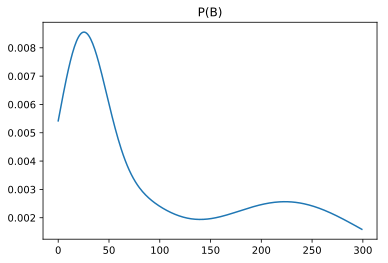

In [192]:
ie = makeBN("real_gdp_categories", ['low', 'medium', 'high'], [0.3, 0.3, 0.4],
            300, [{'fun': norm(), 'min':-1, 'max':12}, {'fun': norm(), 'min':-1, 'max':5}, {'fun': norm(), 'min':-3, 'max':1}])

xp = [-0.15, 0.01]
fp = [0, 300]
print(int(round(np.interp(0.0, xp, fp))))

ie.setEvidence({'B':299 - int(round(np.interp(-0.02, xp, fp)))})
ie.makeInference()
ie.posterior(a)


In [92]:
x = round(5.76543)
print(x) 

6


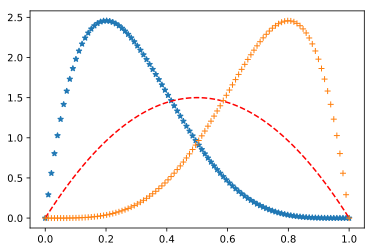

In [299]:
from scipy.stats import beta
x = np.linspace(0, 1.0, 100) 

# Varying positional arguments 
y1 = beta.pdf(x, 2, 5) 
y2 = beta.pdf(x, 2, 2) 
y3 = beta.pdf(x, 5, 2) 
plt.plot(x, y1, "*", x, y2, "r--", x, y3, "+") 

In [282]:
def normalizeB(A, B):
    pdf=beta.pdf(np.linspace(0,1,100), A, B)
    return (pdf/sum(pdf))

In [289]:
def makeBetaBN(a_name, a_categories, a_prior, b_dat):
    bnz=gum.BayesNet("Quasi-Continuous")
    a=bnz.add(gum.LabelizedVariable("A",a_name,a_categories))
    b=bnz.add(gum.RangeVariable("B","A range variable",0,99))
    bnz.addArc(a,b)
    #gnb.showBN(bnz)

    #bnz.generateCPTs()
    bnz.cpt(a)[:] = a_prior
    
    #gnb.showProba(bnz.cpt(a))
    #print(bnz.cpt("B"))
    
    for i, item in enumerate(b_dat):
        #print(a_categories[i])
        #print(normalizeB(item['A'],item['B']))
        bnz.cpt(b)[{'A':a_categories[i]}] = normalizeB(item['A'],item['B'])
    
    #bnz.cpt("B").translate(1e-4).normalizeAsCPT()
    ie=gum.LazyPropagation(bnz)
    ie.makeInference()
    plt.plot(ie.posterior(b)[:]) # the posterior for B
    t=plt.title("P(B)")
    return ie

(gum::Potential<double>@0x7fffeb702360) <A:low> :: 2.23044e-09 /<A:medium> :: 0.234533 /<A:high> :: 0.765467

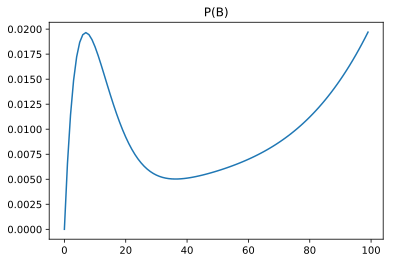

In [298]:
ie = makeBetaBN("real_gdp_categories", ['low', 'medium', 'high'], [0.3, 0.3, 0.4],
            [{'A':2, 'B':15}, {'A':2, 'B':2}, {'A':5, 'B':1}])

xp = [-0.15, 0.01]
fp = [0, 99]
evidence = -0.12
#print(np.interp(evidence, xp, fp))

ie.setEvidence({'B':100 - int(round(np.interp(evidence, xp, fp)))})
ie.makeInference()
ie.posterior(a)

In [306]:
import operator


def dotproduct(vec1, vec2):
    return sum(map(operator.mul, vec1, vec2))

In [316]:
a = [[1,2,3], [2,4,2]] 
b = [[5,5,5], [1,1,1]]

#zip(a, b)
sum(dotproduct(x,y) for x, y in zip(a, b))
# [[30], [8]]

38